In [108]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
os.getcwd()

'/Users/t0rracat/Documents/pokemon_classification/analysis/Gavin'

In [5]:
def clean_cols(cols):
    return [col.lower() for col in cols]

In [6]:
file_path = "/Users/t0rracat/Documents/pokemon_classification/datasets/Pokemon.csv"
#file_path = "C:/Users/domen/github/pokemon_classification/datasets/Pokemon.csv"

df = pd.read_csv(file_path)
df.columns = clean_cols(df.columns)

In [7]:
df.head(4)

,pokedex no.,name,type,other type,hp,attack,defense,special attack,special defense,speed,total,generation,legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,318,1,0
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,405,1,0
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,525,1,0
3,3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,625,1,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   pokedex no.      1045 non-null   int64 
 1   name             1045 non-null   object
 2   type             1045 non-null   object
 3   other type       553 non-null    object
 4   hp               1045 non-null   int64 
 5   attack           1045 non-null   int64 
 6   defense          1045 non-null   int64 
 7   special attack   1045 non-null   int64 
 8   special defense  1045 non-null   int64 
 9   speed            1045 non-null   int64 
 10  total            1045 non-null   int64 
 11  generation       1045 non-null   int64 
 12  legendary        1045 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 106.3+ KB


As we had guessed, there is quite a significant class imbalance in the dataset. Less than 10% of the Pokemon are legendary.

In [9]:
print("-- pct")
print(df.legendary.value_counts(normalize=True))
print("-- counts")
print(df.legendary.value_counts())


-- pct
0    0.878469
1    0.121531
Name: legendary, dtype: float64
-- counts
0    918
1    127
Name: legendary, dtype: int64


array([[<AxesSubplot:title={'center':'hp'}>,
        <AxesSubplot:title={'center':'attack'}>,
        <AxesSubplot:title={'center':'defense'}>,
        <AxesSubplot:title={'center':'special attack'}>],
       [<AxesSubplot:title={'center':'special defense'}>,
        <AxesSubplot:title={'center':'speed'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

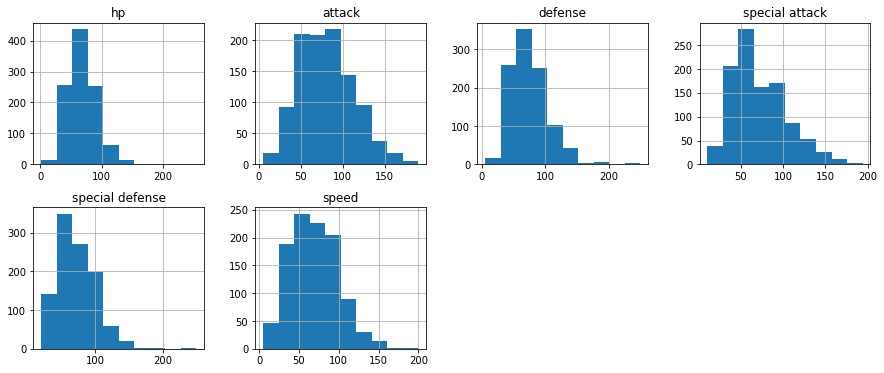

In [12]:
numerical = ['hp', 'attack', 'defense', 'special attack', 'special defense', 'speed']
df[numerical].hist(figsize=(15,6), layout=(2,4))

[Text(0.5, 1.0, 'total stats by Pokemon generation')]

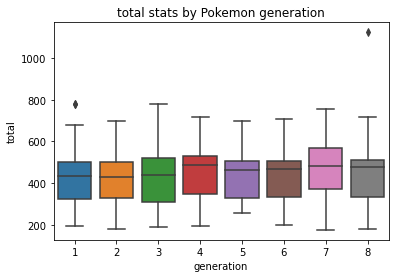

In [13]:
sns.boxplot(x=df.generation, y=df.total).set(title="total stats by Pokemon generation")

In [14]:
df[df["generation"]==8].sort_values(["total"], ascending=False)

,pokedex no.,name,type,other type,hp,attack,defense,special attack,special defense,speed,total,generation,legendary
1033,890,Eternatus Eternamax,Poison,Dragon,255,115,250,125,250,130,1125,8,1
1028,888,Zacian Crowned Sword,Fairy,Steel,92,170,115,80,115,148,720,8,1
1030,889,Zamazenta Crowned Shield,Fighting,Steel,92,130,145,80,145,128,720,8,1
1032,890,Eternatus,Poison,Dragon,140,85,95,145,95,130,690,8,1
1044,898,Calyrex Shadow Rider,Psychic,Ghost,100,85,80,165,100,150,680,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,827,Nickit,Dark,NaN,40,28,28,47,52,50,245,8,0
984,848,Toxel,Electric,Poison,40,38,35,54,35,40,242,8,0
973,837,Rolycoly,Rock,NaN,30,40,50,40,50,30,240,8,0
1009,872,Snom,Ice,Bug,30,25,35,45,30,20,185,8,0


[Text(0.5, 1.0, 'total stats by Pokemon generation - no legendaries')]

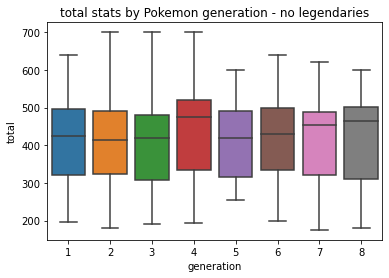

In [15]:
no_legendary_df = df[df.legendary==False]
(sns.boxplot(
    x=no_legendary_df.generation,
    y=no_legendary_df.total)
    .set(title="total stats by Pokemon generation - no legendaries"))


[Text(0.5, 1.0, 'total stats by Pokemon generation - only legendaries')]

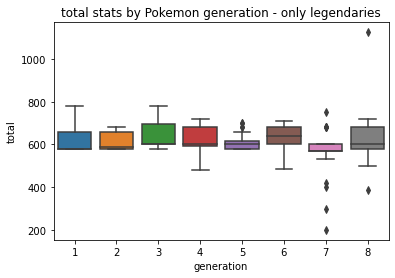

In [16]:
legendary_df = df[df.legendary==True]
(sns.boxplot(
    x=legendary_df.generation,
    y=legendary_df.total)
    .set(title="total stats by Pokemon generation - only legendaries"))


In [97]:
legendary_by_generation = df.groupby(['generation'])['legendary'].value_counts(normalize=True).reset_index(name='pct')
poke_pivot = (legendary_by_generation.pivot(index=['generation'],
                                            columns=['legendary'],
                                            values='pct'))

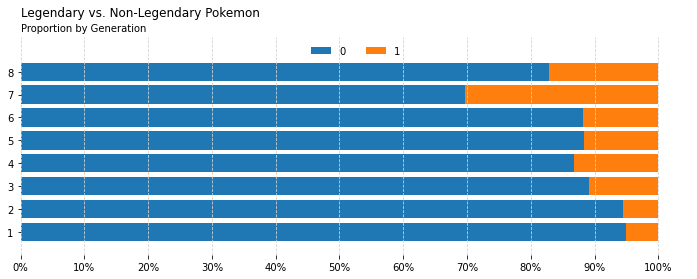

In [98]:
def plot_hbars_stacked_100(data, title, subtitle):
    fields = data.columns.tolist()
    
    fig, ax = plt.subplots(1, figsize=(12,4))
    left = len(data) * [0]
    
    for idx, name in enumerate(fields):
        plt.barh(data.index, data[name], left = left)
        left = left + data[name]
        
    # title and subtitle
    plt.title(title + "\n", loc='left')
    plt.text(0, ax.get_yticks()[-1] + 0.75, subtitle)
    
    # legend
    plt.legend(fields, bbox_to_anchor=([0.58, 1, 0, 0]), ncol=len(fields), frameon=False)
    
    # remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    # format x ticks
    xticks = np.arange(0,1.1,0.1)
    xlabels = ['{}%'.format(i) for i in np.arange(0,101,10)]
    plt.xticks(xticks, xlabels)
    
    # format y ticks
    plt.yticks(data.index)
    
    # adjust limits and draw grid lines
    plt.ylim(0, ax.get_yticks()[-1] + 1.5)
    ax.xaxis.grid(color='lightgray', linestyle='dashed')
    
    plt.show()
    
plot_hbars_stacked_100(poke_pivot, title='Legendary vs. Non-Legendary Pokemon', subtitle='Proportion by Generation')

### Baseline modeling performance using over-sampling method
How good is overall predictability using a simple logistic regression model?

In [ ]:
dataX = df.drop(columns = ['legendary', 'pokedex no.', 'name', 'type', 'other type', 'generation'])
dataY = df['legendary']

train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(dataX, dataY, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

# print(x_train, x_val, x_test)

In [106]:
LR = LogisticRegression()
LR.fit(x_train, y_train) #fitting the model 
y_pred = LR.predict(x_test) #prediction

Confusion matrix, without normalization
[[90  2]
 [ 6  7]]
True Negatives:  90
False Positives:  2
False Negatives:  6
True Positives:  7


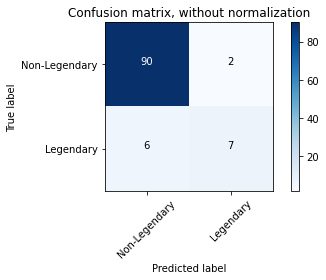

In [113]:
#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non-Legendary','Legendary'],
                      title='Confusion matrix, without normalization')

#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

- **True Positive** — Label which was predicted Positive (in our scenario Legendary) and is actually Positive (i.e. belong to Positive ‘Legendary’ Class).
- **True Negative** — Label which was predicted Negative (in our scenario Non-Legendary) and is actually Negative (i.e. belong to Negative ‘Non-Legendary’ Class).
- **False Positive** — Label which was predicted as Positive, but is actually Negative, or in simple words the Pokemon was wrongly predicted as Legendary by our Model, but is actually Non-Legendary. In Hypothesis Testing it is also known as **Type 1 error** or the incorrect rejection of Null Hypothesis.
- **False Negatives** — Labels which was predicted as Negative, but is actually Positive (Legendary predicted as Non-Legendary). It is also known as **Type 2 error**, which leads to the failure in rejection of Null Hypothesis.
<img src="https://www.simplypsychology.org/type-1-and-2-errors.jpg" width="600">

Accuracy 92.38%:

Precision 0.78
Higher precision -> fewer false positives (predicted as Legendary but actually Non-Legendary)

Recall 0.54
Higher recall -> fewer false negatives (actually Legendary but predicted as Non-Legendary)

F1 Score 0.64
Harmonic mean of Precision & Recall, used to indicate a balance between Precision & Recall. Ranges between 0 - 1.

F2 0.57

F0.5 0.71
It is the general form of F measure — Beta 0.5 & 2 are usually used as measures, 0.5 indicates the Inclination towards Precision whereas 2 favors Recall giving it twice the weightage compared to precision.

Specificity 0.98
True Negative Rate


/Users/t0rracat/miniforge3/envs/pk_classifier/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


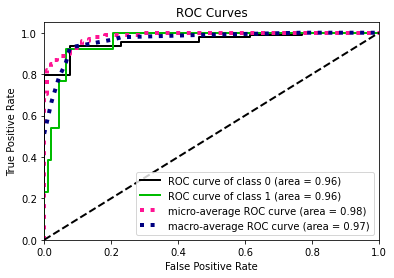

In [125]:
# model accuracy
#Accuracy
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("Accuracy {:0.2f}%:".format(Accuracy))
print()

#Precision 
Precision = tp/(tp+fp) 
print("Precision {:0.2f}".format(Precision))
print("Higher precision -> fewer false positives (predicted as Legendary but actually Non-Legendary)")
print()

#Recall 
Recall = tp/(tp+fn) 
print("Recall {:0.2f}".format(Recall))
print("Higher recall -> fewer false negatives (actually Legendary but predicted as Non-Legendary)")
print()

#F1 Score
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score {:0.2f}".format(f1))
print("Harmonic mean of Precision & Recall, used to indicate a balance between Precision & Recall. Ranges between 0 - 1.")
print()

#F-beta score calculation
def fbeta(precision, recall, beta):
    return ((1+pow(beta,2))*precision*recall)/(pow(beta,2)*precision + recall)
            
f2 = fbeta(Precision, Recall, 2)
f0_5 = fbeta(Precision, Recall, 0.5)

print("F2 {:0.2f}".format(f2))
print("\nF0.5 {:0.2f}".format(f0_5))
print("It is the general form of F measure — Beta 0.5 & 2 are usually used as measures, 0.5 indicates the Inclination towards Precision whereas 2 favors Recall giving it twice the weightage compared to precision.")
print()

#Specificity 
Specificity = tn/(tn+fp)
print("Specificity {:0.2f}".format(Specificity))
print("True Negative Rate")

#ROC
import scikitplot as skplt #to make things easy
y_pred_proba = LR.predict_proba(x_test)
skplt.metrics.plot_roc_curve(y_test, y_pred_proba)
plt.show()

Beause we have class imbalance, the following performance measures should be considered when evaluating our model:
- Confusion matrix
- Precision (exactness)
- Recall (completeness)
- F-score (weighted average of precision and recall)
- ROC curves (sensitivity and specificity)
- Kappa (or Cohen's kappa)